In [18]:
import cv2
import cv_packages as mycv
import numpy as np

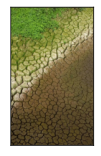

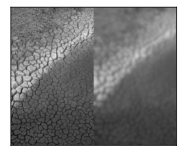

In [19]:
img = cv2.imread('code/matlab/canny/33.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mycv.set_figsize((3.5, 2.5))
mycv.show_image(img)
blur = cv2.cvtColor(cv2.GaussianBlur(img, (55, 55), 0, 0), cv2.COLOR_BGR2GRAY)
result = cv2.hconcat([gray, blur])
mycv.show_image(result, gray=True)

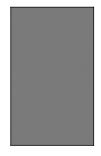

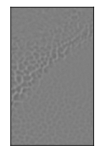

In [20]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
mycv.show_image(laplacian, gray=True)
log = cv2.Laplacian(blur, cv2.CV_64F)
mycv.show_image(log, gray=True)

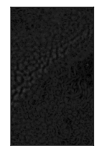

In [21]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
my_laplacian = cv2.filter2D(blur, -1, kernel)
mycv.show_image(my_laplacian, gray=True)

## DOG

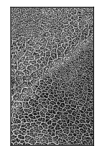

In [27]:
# 定义两个不同尺度的高斯滤波器
sigma1 = 1
sigma2 = 3

# 计算高斯核大小
ksize1 = int(6 * sigma1 + 1)
ksize2 = int(6 * sigma2 + 1)

# 对图像进行高斯滤波
gaussian1 = cv2.GaussianBlur(gray, (ksize1, ksize1), sigmaX=sigma1)
gaussian2 = cv2.GaussianBlur(gray, (ksize2, ksize2), sigmaX=sigma2)

# 计算两个高斯滤波器之差，得到DoG图像
dog = gaussian1 - gaussian2
mycv.show_image(dog, gray=True)

## Canny

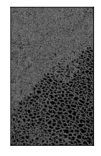

In [30]:
# 定义Canny边缘检测器的低阈值和高阈值（比例为3:1或者3:4）
low_threshold = 50
high_threshold= low_threshold *3

# 对图像进行Canny边缘检测，得到Canny图像canny(x,y)
canny_img= cv2.Canny(img , low_threshold , high_threshold )
mycv.show_image(canny_img, gray=True)

## 曲率滤波

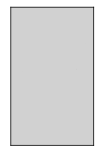

In [35]:
def GaussianCurvatureFilter(img,sigma):
    # 高斯模糊
    img = cv2.GaussianBlur(img,(5,5),sigma)
    # 计算梯度
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    # 计算Hessian矩阵
    sobelxx = cv2.Sobel(sobelx,cv2.CV_64F,1,0,ksize=3)
    sobelyy = cv2.Sobel(sobely,cv2.CV_64F,0,1,ksize=3)
    sobelxy = cv2.Sobel(sobelx,cv2.CV_64F,0,1,ksize=3)
    # 计算高斯曲率
    K = (sobelxx*sobelyy-sobelxy**2)/(sobelx**2+sobely**2+1e-10)**(3/4)
    # 计算新图像
    new_img = img - K*img
    return new_img

img = cv2.imread('code/matlab/canny/33.jpg')
# 读取图像并转为灰度
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY).astype(np.uint8)

# 调用高斯曲率滤波函数
new_img = GaussianCurvatureFilter(gray_img,sigma=0.5)
mycv.show_image(new_img, gray=True)